 ### For this project I want to explain more about linear regression and it's applications to real life problems
 
*  Hi! I’m Leonardo, an undergraduate Information Systems student with interest in Machine Learning and Data Science. If you’d like to learn more about my work, feel free to check my Linktree: https://linktr.ee/leoantero. Kind regards, Leo

## The project is divided in 3 topics
* Exploratory data analysis
* Explanation about how we can implement linear regression 
* The linear regression implementation with scikit learn

__You may be asking your self: "But, what is linear regression?"__


Basically, linear Regression is a supervised machine learning algorithm that attempts to predict a number from given data, or in other words, it's a statistical technic that tries to find the relationship between variables.

* This dataset is from kaggle, this is the link: https://www.kaggle.com/datasets/kolawale/focusing-on-mobile-app-or-website?resource=download&select=Ecommerce+Customers

In [9]:
# These libraries are essential for data analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# As the file is in the same paste as the project we can just write like this
# Else you should write all the directory path 
df = pd.read_csv('ecommerce')

# Exploratory Data Analysis

In [6]:
df.head()
# First five lines of the dataset

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [5]:
# At first sight we might take a look for the dataset properties and characteristics
# For this we use functions like '.info()', '.describe()', '.head()', etc
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


As the function shows, the data is surprisingly clean, with no null data

Moreover there are 8 columns.
- Email
- Address
- Avatar
- Avg. Session Length
- Time on App
- Time on Website
- Length of Membership
- Yearly amount spent

All with exaclty 500 instances.

So, based in the numeric variables we will predict they yearly amount spent.

In [7]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


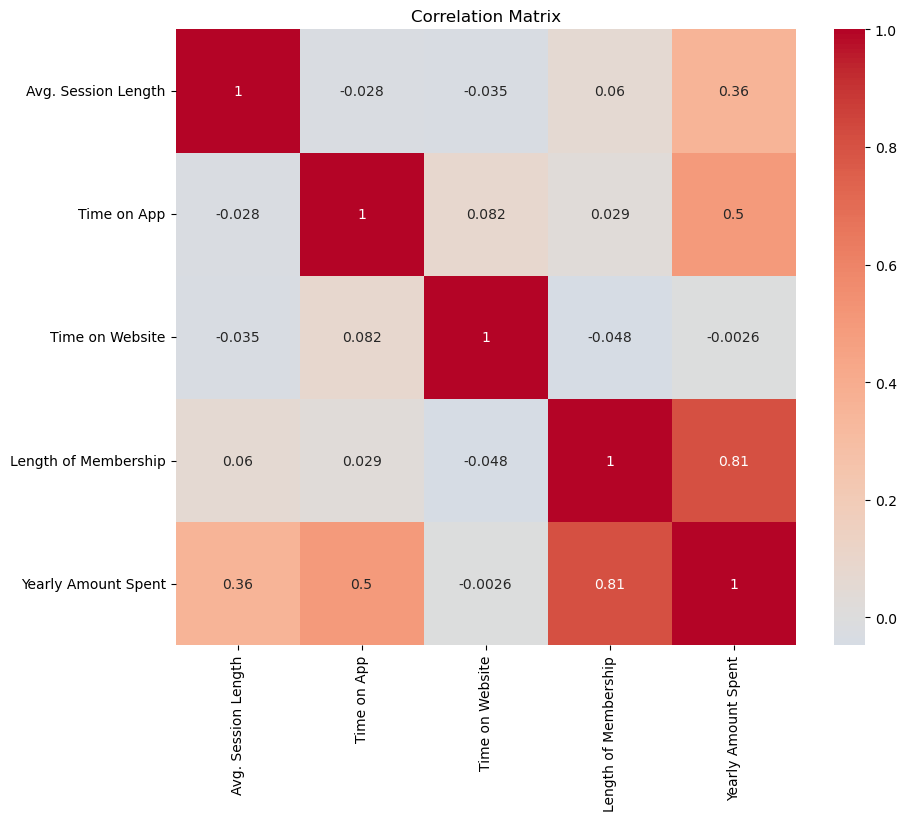

In [24]:
# Starting with some exploratory data analysis
# Correlation between numeric variables

plt.figure(figsize=(10,8))
corr = df.select_dtypes(include=np.number).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Matrix")
plt.show()

The heatmap is very important when we are talking about the influence of an variable against any other. It tells the correlation between all variables with the others.
With this information in hands, the model can be constructed more precisely

<function matplotlib.pyplot.show(close=None, block=None)>

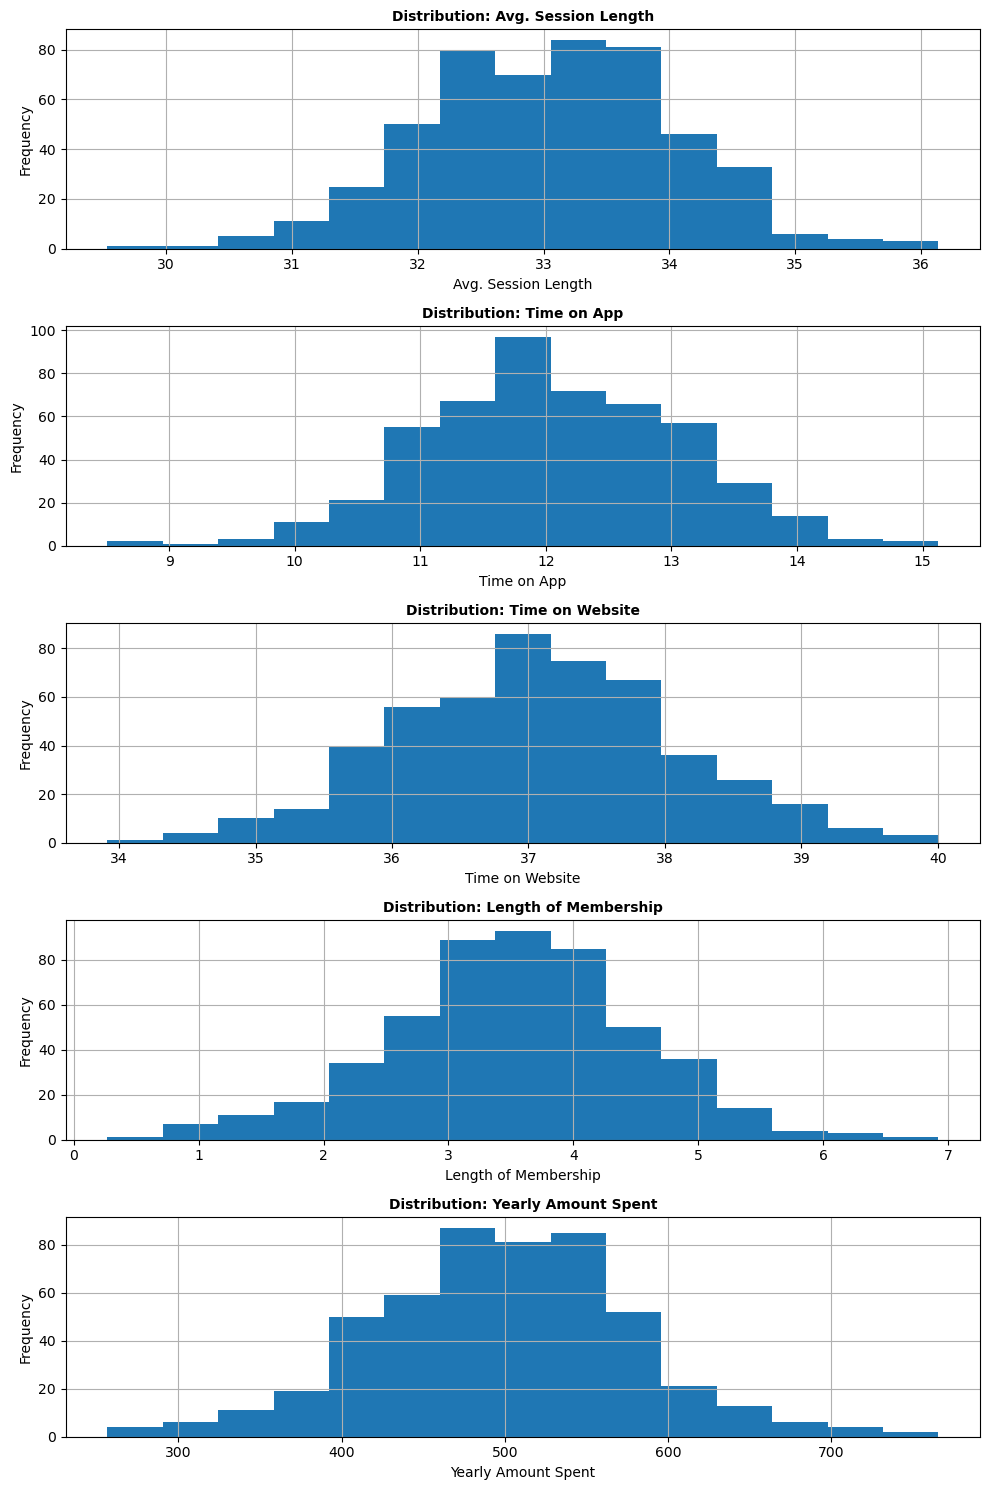

In [23]:
# Let's take a look at the distribution of the numeric columns

numeric_columns = df.select_dtypes(include=np.number).columns
fig, axes = plt.subplots(len(numeric_columns), 1, figsize = (10, 3*len(numeric_columns)))

for idx, col in  enumerate(numeric_columns):
    ax = axes[idx] if len(numeric_columns) > 1 else axes
    df[col].hist(bins=15,ax=ax)
    ax.set_title(f"Distribution: {col}", fontsize = 10, fontweight='bold')
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")
plt.tight_layout()
plt.show

This shows us that all of the columns holds a distribution next to the Normal Distribution

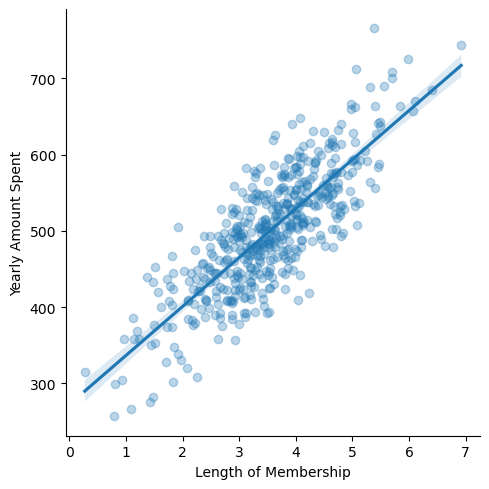

In [26]:
sns.lmplot(x = 'Length of Membership', 
           y = 'Yearly Amount Spent',
           data = df,
           scatter_kws={'alpha':0.3})

# I will use this graphic to explain a lit bit more about the linear regression

# The mathematical concept of linear regression and its intuition

Earlier in this notebook I mentioned that linear regression is one of the ways
to discover relationships between variables. 

We do this using functions. In mathematics, a function works like a machine, and based on your input, it gives you an output.

* Example: for f(x) = 2x + 3, if the input is x = 2, the output will be f(2) = 7

And this is exactly what we want for linear regression. Given an input (this could be anything, you can know more about the applications further in this notebook), we want the best possible prediction.

We calculate this by finding a function (represented by a line) that has the minimum squared distance to every single point in the data. This function is made by constantly measuring the error and updating the parameters, with the method we call gradient descent.

This is a very simple explanation about linear regression, so if you want to know more about it I recommend you to search for Andrew Ng lectures in the internet, very good professor!

In [46]:

from sklearn.model_selection import train_test_split

X = df[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
y = df['Yearly Amount Spent']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=15)

#### Train and test split
An important step in machine learning is the train/test split. A common approach is a 70/30 division, where 70% of the data is used to train the model and 30% is reserved to test it. This allows us to validate the performance of the model with unseen data.

#### K-fold cross-validation
Another powerful technique is k-fold cross-validation, where instead of a single split, we divide the training data into k equal parts (folds). The model is trained k times and each time, it uses k−1 folds for training and the remaining fold for validation. This process repeats until every fold has been used as a validation set, providing a more robust measure of accuracy.

In [47]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)
lm.coef_

# The coefficients helps us understand the relationship between variables
# The higher this number is, the greater its the influence 

impact = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficients'])
print(impact)

                      Coefficients
Avg. Session Length      25.471465
Time on App              38.656898
Time on Website           0.570848
Length of Membership     61.838675


According to our model, these coefficients imply the following formula
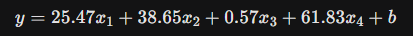


Text(0.5, 1.0, 'Comparsion between the predicted value and the actual values')

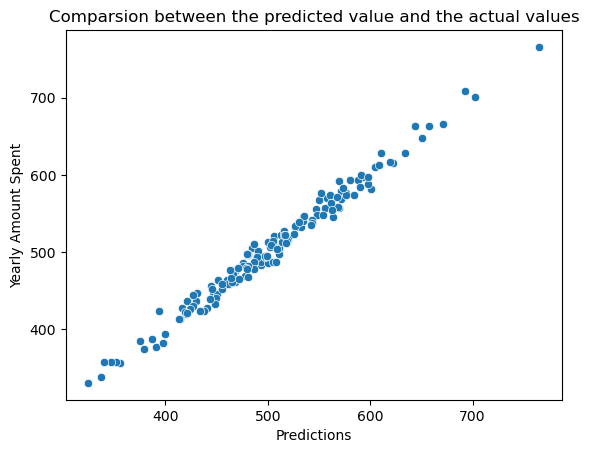

In [51]:
# With the model trained now we can make a prediction and evaluate the results
predict = lm.predict(X_test)
sns.scatterplot(x=predict, y=y_test)
plt.xlabel("Predictions")
plt.title("Comparsion between the predicted value and the actual values")

The scatter plot shows that the model had a nice fit to the data since the relation between the predicted values and the original values follows an linear function

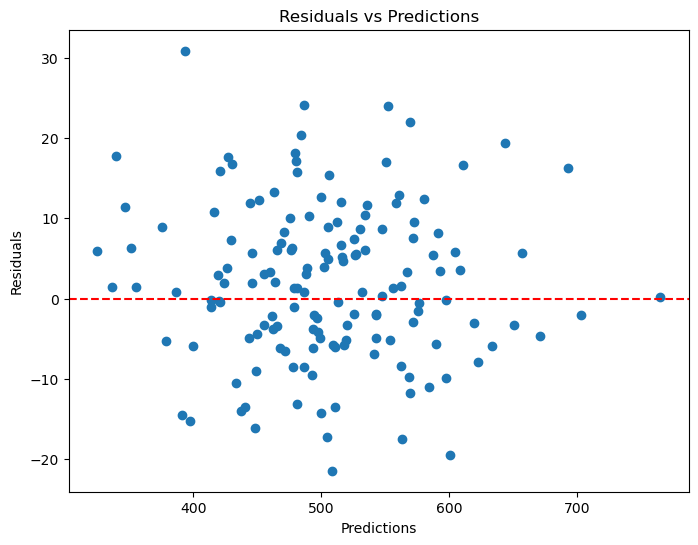

In [55]:
residuals = y_test -  predict
plt.figure(figsize=(8,6))
plt.scatter(predict, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predictions')
plt.ylabel('Residuals')
plt.title('Residuals vs Predictions')
plt.show()

##### Residuals vs. Predictions analysis

To check if our model is reliable, we look at the residuals plot. 

* **what we want to see:** a random "cloud" of points.
* **what we have:** exactly this! the points are scattered randomly around the red line.

Basically, this plot shows that our model is doing a great job. Since there are no clear patterns (like curves or funnels), it means our linear approach fits the data well and the remaining errors are just random noise.

Text(0.5, 1.0, 'Residuals distribution')

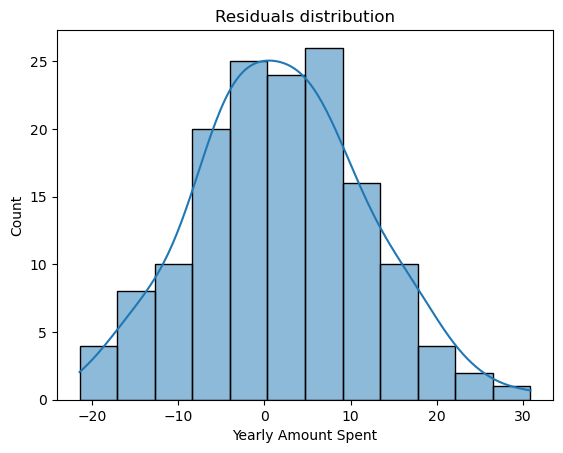

In [69]:
sns.histplot(residuals, bins=12, kde=True)
plt.title("Residuals distribution")

* With this plot is easier to see the model performance, the residual is the difference between the actual values and the predicted values, if the residuals predictions have normal distribution this means our model frequently predicts a value next to the original value.

## Conclusion
According to our model, the most significant feature for the money spent is the length of membership, the longer a customer stays with the company, the more money they spend. And with more data and business informations we could extract insights, test hypothesis, etc based on this.

When comparing platforms, the mobile app is the clear winner. Time spent on the app has a huge impact on spending, while the desktop has almost zero correlation with the final result.

Based on this, the company should invest more in mobile features, notifications and focus on improving the customer experience in the app, willing to make them pass more time in the app and consequently, buying. Moreover, they should think about solutions for the website, maybe giving a total redesign or keeping just for support.

## Business Applications of linear regression
Linear regression is one of the most used tools in corporate world! It helps to answer a lot of questions, like "If we change X, what happens to y?"

For human resources it can be used to understand the employee perfomance based on years of experience or training hours.
In finance can estimate the stock prices or risk based on market trends and interest rates
Marketing can calculate the roi (return on investment)

There are a lot of different applications of linear regression and now I hope you know more about this so beautiful tool.
